The files krk-airlines.csv, krk-flights.csv and krk-passengers.csv contain data about flights from Krakow Airport. Using Power Query, import and merge the data. Then, create the following charts:

the number of people traveling to London and Paris
the number of men and the number of women traveling on each airline

In [4]:
import pandas as pd
airlines = pd.read_csv('krk-airlines.csv')
passengers = pd.read_csv('krk-passengers.csv')
flights = pd.read_csv('krk-flights.csv')

flights_and_passengers = pd.merge(flights, passengers, on='flight')
flights_and_passengers

,flight,from,to,airlineid,name,surname,gender
0,LN222,Krakow,London,PE,Ferguson,Osban,Male
1,LN222,Krakow,London,PE,Nehemiah,Budcock,Male
2,LN222,Krakow,London,PE,Lindi,Snoad,Female
3,LN222,Krakow,London,PE,Willyt,Matlock,Female
4,LN222,Krakow,London,PE,Nolana,Pattie,Female
...,...,...,...,...,...,...,...
95,NY777,Krakow,New York,BS,Joel,Tuther,Male
96,NY777,Krakow,New York,BS,Janos,Notman,Male
97,NY777,Krakow,New York,BS,Vance,Emmet,Male
98,NY777,Krakow,New York,BS,Angelina,Grinham,Female


In [10]:
flights_and_passengers.query("to=='London' or to=='Paris'").groupby(by="to")['surname'].count()

to
London    15
Paris     41
Name: surname, dtype: int64

<AxesSubplot:title={'center':'dupa'}, xlabel='to'>

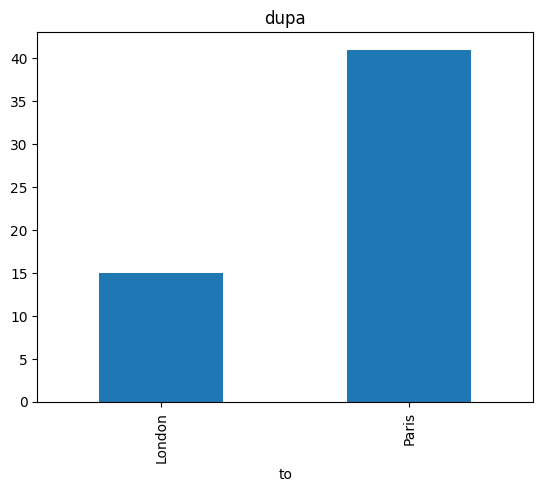

In [12]:
flights_and_passengers.query("to=='London' or to=='Paris'").groupby(by="to")['surname'].count().plot(kind='bar', title='dupa')

In [30]:
flights_and_passengers.groupby(by=['gender', 'flight'])['surname'].

TypeError: no numeric data to plot

<AxesSubplot:xlabel='airlineid,gender'>

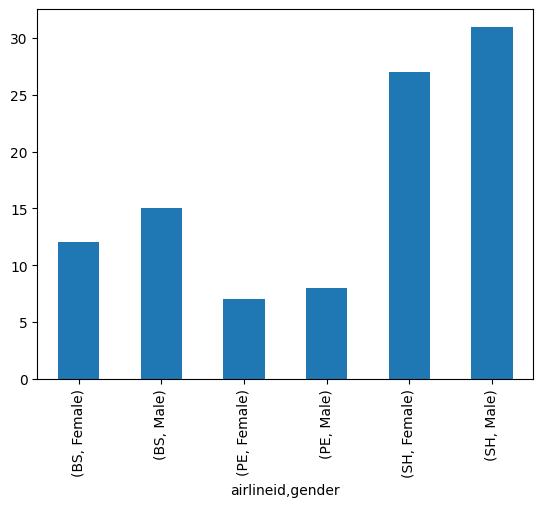

In [31]:
flights_and_passengers.groupby(by=['airlineid', 'gender'])['surname'].count().plot(kind='bar')

<AxesSubplot:xlabel='airlineid'>

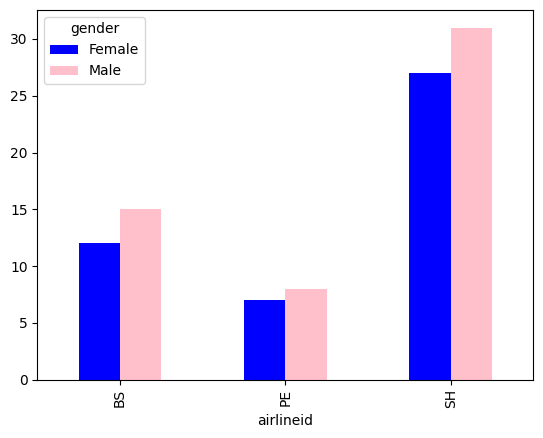

In [36]:
gender_counts = flights_and_passengers.groupby(['airlineid', 'gender']).size().unstack(fill_value=0)

# Plotting directly from the DataFrame
gender_counts.plot(kind='bar', color=['blue', 'pink'])